# Predicting Student Academic Success or Dropout

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [42]:
df = pd.read_csv('Data/Dropout_Academic_Success.csv', delimiter=',')
display(df)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Exploratory data analysis

In [43]:
df.describe().round(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.18,18.67,1.73,8856.64,0.89,4.58,132.61,1.87,19.56,22.28,...,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,0.00
std,0.61,17.48,1.31,2063.57,0.31,10.22,13.19,6.91,15.60,15.34,...,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27
min,1.00,1.00,0.00,33.00,0.00,1.00,95.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,1.00,1.00,1.00,9085.00,1.00,1.00,125.00,1.00,2.00,3.00,...,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70
50%,1.00,17.00,1.00,9238.00,1.00,1.00,133.10,1.00,19.00,19.00,...,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,0.32
75%,1.00,39.00,2.00,9556.00,1.00,1.00,140.00,1.00,37.00,37.00,...,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79
max,6.00,57.00,9.00,9991.00,1.00,43.00,190.00,109.00,44.00,44.00,...,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51


In [45]:
#Checking null values:
pd.isnull(df).sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

#### Distribution of target feature

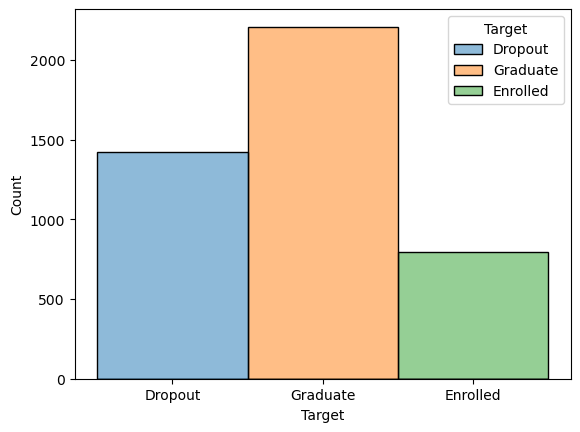

In [38]:
# Plot the distribution of the target feature
sns.histplot(data=df, x='Target', hue='Target', kde=False)
plt.show()

In [41]:
# Calculate the number and percentage of instances for each category in the target feature
counts = df['Target'].value_counts()
percentages = 100 * counts / sum(counts)

print("Number of instances for each category:")
print(counts)
print("\nPercentage of instances for each category:")
print(percentages.round(2))

Number of instances for each category:
Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

Percentage of instances for each category:
Graduate    49.93
Dropout     32.12
Enrolled    17.95
Name: Target, dtype: float64
